## Bussiness Problem

**What is Fake News?**

Fake news is the deliberate presentation of (typically) false or misleading claims as news, where the claims are misleading by design.

**How News and digital medium evolved?**

The news media evolved from newspapers, tabloids, and magazines to a digital form such as online news platforms, blogs, social media feeds, and many news mobile app. News outlets benefitted from the widespread use of social media/mobile  platforms by providing updated news in near real time to its subscribers. 

It became easier for consumers to acquire the latest news at their fingertips. So, These digital media platforms become very powerful due to their easy accessibility to the world and  ability to allow users to discuss and share ideas and debate over issues such as democracy, education, health, research and history. 

However, apart from advantage false/fake news article on digital platforms are getting very common and mainly used with a negative intent for their own benifit such as political and finacial benefit, creating biased opinions, manipulating mindsets, and spreading absurdity. 

**How big this Problem ?**

With the rapid adoption of Internet, social media and digital platforms (such as Facebook, Twitter, news portals or any social media), anybody can spread untrue and biased information. It is virtually impossible to prevent Fake News from being created
There has been a rapid increase in the spread of fake news in the last decade, it's not limited any one domain like politics but covering various other domains such as sports, health, history, entertainment and also science and research. If we take example of 2016 US presidential election, there were lots biased and fake news published to influence. Another example could be of COVID-19, we generally come accross many misleading/fake news everyday which can have serious consequences and may lead to create panic among people and spread pandemic more rapidly. 

**What is Solution?**

Therefore, It is important and absolute necessary to identif yand differentiate Fake News from real news. One of the ways to determine by expert and fact check of every news, but this is time consuming and requires skills which can not shared. Second, we can automate the detection of Fake News by using the techniques of Machine learning and Artificial Intelligence.
The Online news content has diverse unstructure format data(such as documents, videos, and audios), here we will conetrate on text format news. With the advancement of and Natural language processing It is possible now that we can identify the deceptive and fake nature of article or sentence.

There are wide spread study and experiment is happing in this area to identify the Fake news for all medium(Video, audio and Text) news. In our study we used [Fake news](https://www.kaggle.com/c/fake-news/data) to classify unreliable news article as Fake news using Deep learning Technique Sequence to Sequence programming.



In [1]:
# Download data source and few other library if not already downloaded.

#!wget -P ./../input/ https://www.kaggle.com/c/fake-news/data
#!wget -P ./../resource/glove/ http://nlp.stanford.edu/data/glove.6B.zip
#!unzip ./../resource/glove/glove.6B.zip -d ./../resource/glove/


In [2]:
### Import all library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
def read_data(filename,**kwargs):
    raw_data=pd.read_csv(filename,**kwargs)
    return raw_data

In [4]:
# Setup Directory Path
root_dir = str(Path().resolve().parent)
input_dir = root_dir+"/input/"
output_dir = root_dir+"/output/"
model_dir = root_dir+"/model/"
image_dir = 'images/'
print(root_dir)

C:\Users\Shubhangam\Desktop\Desktop\Programming\training


## Data Understanding
Datasets: [Fake news](https://www.kaggle.com/c/fake-news/data)
We will read here understand their charchteristics.

In [5]:
#### READ DATASTS

news_df= read_data("venv/Fake news detection/input/train.csv")
submit_test = read_data('venv/Fake news detection/input/test.csv')
submit_label = read_data('venv/Fake news detection/input/submit.csv')
submit_test['label'] = submit_label.label
print(" Shape of News data :: ", news_df.shape)
print(" News data columns", news_df.columns)
print(" Test columns", submit_test.columns)
news_df.head(20)

 Shape of News data ::  (20800, 5)
 News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
 Test columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
news_df["text"][5]

'In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wo

In [7]:
submit_test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [8]:
news_df["text"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

#### Note : There no label for test dataset., So we will use train set for training and validation after split.

In [9]:
#Text Word startistics: min.mean, max and interquartile range

text_len = news_df.text.str.split().str.len()
text_len.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [10]:
#Title startistics 

title_len = news_df.title.str.split().str.len()
title_len.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

The statistic of Train and Test datasets are following: 
1. Attribute **text** having more words count with average of 760 words and 75% are less than 1000 word.
2. Attribute **title** are small sentence with average of 12 words and 75% are less than 15 only.

From following columns ['id', 'title', 'author', 'text', 'label'] we will not include id and author.

**Our experiment would be with both text and title together**

####  Count plot for both labels are


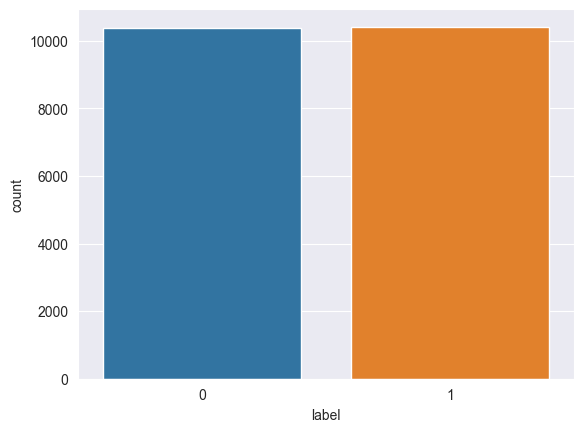

In [11]:
sns.countplot(x="label", data=news_df);
plt.show()

## Approach :  Sequence Problem Neural Network

### Sequence Problem
- Sequences is a predictive modelling problem, in which you have a certain sequence of entries, and the task is to predict the next sequence. The input and output sequence could vary one to many sequence. The difficulty of this problem lies in the fact that sequences can vary in length. 
- Example of sequence problem:
    - Text classification, snetimenent analysis: Where text are sequence of word, which could be long sentence
    - Timeseries prediction: Stock, financial prediction
    - Music generation
    - Question Answering, Language modeling, Neural machine translation
    - etc.
    

- Types of Sequence Problem
    1. One-to-One: Where there is one input and one output. Typical example of a one-to-one sequence problems is the case where you have an image and you want to predict a single label for the image.
    
    2. Many-to-One: In many-to-one sequence problems, we have a sequence of data as input and we have to predict a single output. Text classification is sequence problems where we have an input sequence of words and we want to predict a single output tag.
    
    3. One-to-Many: In one-to-many sequence problems, we have single input and a sequence of outputs. A typical example is an image and its corresponding description.
    
    4. Many-to-Many: Many-to-many sequence problems involve a sequence input and a sequence output. For instance, stock prices of 7 days as input and stock prices of next 7 days as outputs. 

**Note: Challenge is to handle large input and output sequence.**
    
### Simple RNN, LSTM and GRU

### RNN :  Recurrent Neural Network

Recurrent Neural Networks (RNN) are designed to work with sequential data. RNN uses the previous information in the sequence to produce the current output. To understand this better takes an example sentence.

    “My class is the best class.”

At the time(T0 ), the first step is to feed the word “My” into the network. the RNN produces an output.

At the time(T1 ), then at the next step we feed the word “class” and the activation value from the previous step. Now the RNN has information of both words “My” and “class”.

And this process goes until all words in the sentence are given input. You can see the animation below to visualize and understand.

![<'RNN workflow'>](./../resource/notebook/RNN-workflow.gif "RNN Workflow")

#### RNN Architecture : It takes input from the previous step and current input.

![<'RNN workflow'>](./../resource/notebook/RNN-gate-update.gif "RNN Architecture")

#### Note:
2. RNN weights and bias for all the nodes in the layer are same.
3. In case of more steps it suffers from vanishing gradient more than other neural network architectures.


## Problem With RNN
### Vanishing gradient and Exploding Gradient 



Training a neural network has three major steps. 
- First, it does a forward pass and makes a prediction. 
- Second, it compares the prediction to the ground truth using a loss function. The loss function outputs an error value which is an estimate of how poorly the network is performing. 
- Last, it uses that error value to do back propagation which calculates the gradients for each node in the network.

![<'Gradient Loss'>](./../resource/notebook/gradient_loss.gif)

The gradient is the value used to adjust the networks internal weights, allowing the network to learn. The bigger the gradient, the bigger the adjustments and vice versa. 
Here is where the problem lies. When doing back propagation, each node in a layer calculates it’s gradient with respect to the effects of the gradients, in the layer before it. So if the adjustments to the layers before it is small, then adjustments to the current layer will be even smaller.

That causes gradients to exponentially shrink as it back propagates down. The earlier layers fail to do any learning as the internal weights are barely being adjusted due to extremely small gradients. And that’s the vanishing gradient problem.

To train a recurrent neural network, you use an application of back-propagation called back-propagation through time. The gradient values will exponentially shrink as it propagates through each time step.

![<'BPTT Architecture'>](./../resource/notebook/many-to-one.JPG)

Again, the gradient is used to make adjustments in the neural networks weights thus allowing it to learn. Small gradients mean small adjustments. That causes the early layers not to learn.

1. The **current** state is a function of the **previous** state and the current input: 
$h_t = \sigma(W_{R}h_{t-1} + W_{F}x_t)$
2. The gradient of the loss $E_t$ at time $t$ on $W_{R}$ is a function of the current hidden state and model predictions $\hat{y}_t$ at time t: 
$\frac{\partial E_t}{\partial W_{R}} = \frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial W_{R}}$
3. Substituting (1) into (2) results in a **sum over all previous time-steps**:
$\frac{\partial E_t}{\partial W_{R}} = \sum\limits_{k=0}^{t} \underbrace{\frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial h_k}\frac{\partial h_k}{\partial W_{R}}}_\text{product of gradient terms}$

The problem is that $\frac{\partial h_t}{\partial h_k} = \Pi_j \frac{\partial h_j}{\partial h_{j-1}}$ for j from $k + 1$ to $t$.  Because of this **repeated multiplicative interaction**, as the sequence length $t$ gets longer, the gradients themselves can get diminishingly small (**vanish**) or grow too large and result in numeric overflow (**explode**).

**Two main Issues with RNN:**
1. Due to short-term memory it’s too difficult for RNN to learn to preserve information over many timesteps.
2. Hidden state is constently being rewritten due to vanishing gradient.

**So need to solve these two issue using Memory and Gated Machinism, which can handle long sequence and their gredeint. These two issue would resolved by LSTM and GRU using multiple gate/memory cells.**




## LSTM: Long Short Time Memory

An LSTM has a similar control flow as a recurrent neural network but the differences are the operations within the LSTM’s cells that it propogates long sequence information. It solve the problem of short-term memory and vanishing gradients.

![<'LSTM Architecture'>](./../resource/notebook/LSTM-gate_update.gif)

**Forget gate**
It controls what is kept vs forgotten, from previous cell state. In laymen terms, it will decide how much information from the previous state should be kept and forget remaining.

**Input gate**
To update the cell state, It controls what new information will be added into cell state.

**Output gate**
It controls which parts of the cell are output to the hidden state. It will determine what the next hidden state will be.

**Cell State**
This is memory state, which will carry forward throught all the layers and maintain long sequences.

**Hidden state** : The final hidden state is dependent on the updated cell state,previous hidden state and current input content.

<b>Summary</b>

- LSTMs have three types of gates: input gates, forget gates, and output gates that control the flow of information.
- The hidden layer output of LSTM includes the hidden state and the memory cell. Only the hidden state is passed into the output layer. The memory cell is entirely internal.
- Cell state captures both short-term and long-term dependencies in sequences.

### GRU: Gated Recurrent Units
The workflow of GRU is same as LSTM but the difference is in the operations inside the GRU unit. Let’s see the architecture of it.

![<'RNN workflow'>](./../resource/notebook/GRU-gate.gif "GRU Architecture")

GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.

**Update gate** : 
The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add. 

**Reset gate** : 
The gate is used to decide whether the previous state is important or not and decide how much past information to forget.

**Hidden state** : It is just simply the same as the hidden state(activation) of RNN, which acts like neural network menory. The final hidden state is dependent on the update gate. Remove some content from hidden state, and write some new content.

- In GRU the final cell state is directly passing as the activation to the next cell.

<b>Summary</b>
- If sigmoid(update gate) close to 1, then we can copy information in that unit through many steps!
    Sigmoid Controls how much of past state should matter now.
- If reset close to 0, ignore previous hidden state (allows the model to drop information that is irrelevant in the future).
- Reset gates help capture short-term dependencies in sequences.
- Update gates help capture long-term dependencies in sequences.

Images Refrences : [RNN,GRU,LSTM](https://towardsdatascience.com/animated-rnn-lstm-and-gru-ef124d06cf45)

**Many to One Sequence problem**, There news article would be sequence of multiple words and output would be only one.
Identify when an article might be fake news

### Steps to Build Many to One Sequence Problem for Text
1. Clean Datasets: remove unused rows and columns, imput null etc
2. Preprocessing: NLTK processing, 
3. Data Preperation
    - Vectorization, Sequence data preperation, Padding to have equal sequence length
4. Sequence representation: 
    - Onehot ecoding, Word embedding etc
5. Build Emedding Layer
6. Build Neural Network model
7. Compile and fit model
8. Hyperparamter tunning
9. Model Performance

## Clean Datasets: 
   - Drop unused row and columns
   - Null value imputation
   - Remove special characters
   - Remove stop words

In [12]:
## Constants Used for cleaning the datasets
column_names = ['id', 'title', 'author', 'text', 'label']
remove_columns = ['id','author']
categorical_features = []
target_col = ['label']
text_features = ['title', 'text']

In [13]:
## Clean Datasets

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused clumns
def remove_unused_columns(df,column_names=remove_columns):
    df = df.drop(column_names,axis=1)
    return df

# Impute null values with None
def null_processing(feature_df):
    for col in text_features:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_datasets(df):
    # remove unused column
    df = remove_unused_columns(df)
    #impute null values
    df = null_processing(df)
    return df

## Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words,
# Stemming and
# Lemmetization
# For our project we use only Stop word removal
def nltk_preprocesing(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text


df = clean_datasets(news_df)
df_test = clean_datasets(submit_test)

df["text"] = df.text.apply(nltk_preprocesing)
df_test["text"] = df_test.text.apply(nltk_preprocesing)

df["title"] = df.title.apply(nltk_preprocesing)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubhangam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubhangam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df.head()

,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1


## Explorative Data Analysis
- Univariate Analysis: Statistical Analysis of Text, Word cloud
- Bivariate Analysis : Bigram and Trigram


### Single word word cloud
Most frequent word appear with Bold and bigger font.
#### Word cloud for all word in datasets

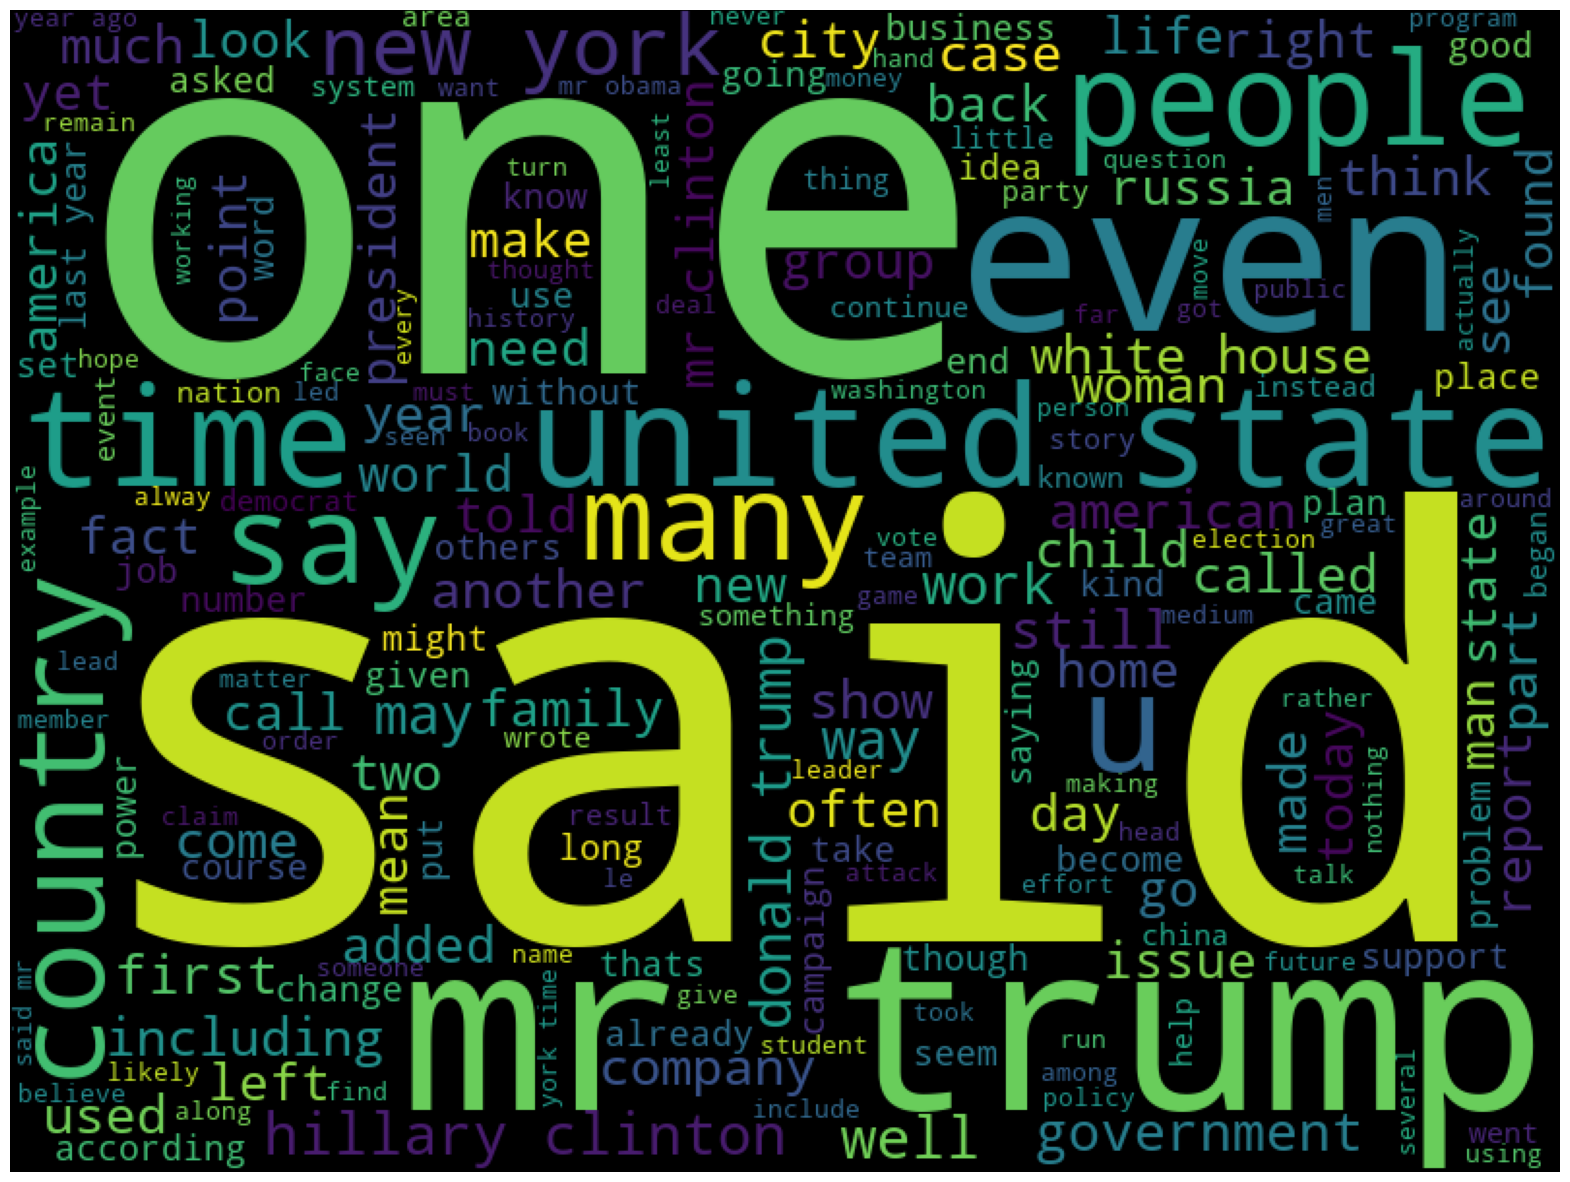

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( background_color='black', width=800, height=600)

text_cloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

### Word cloud for True label news only

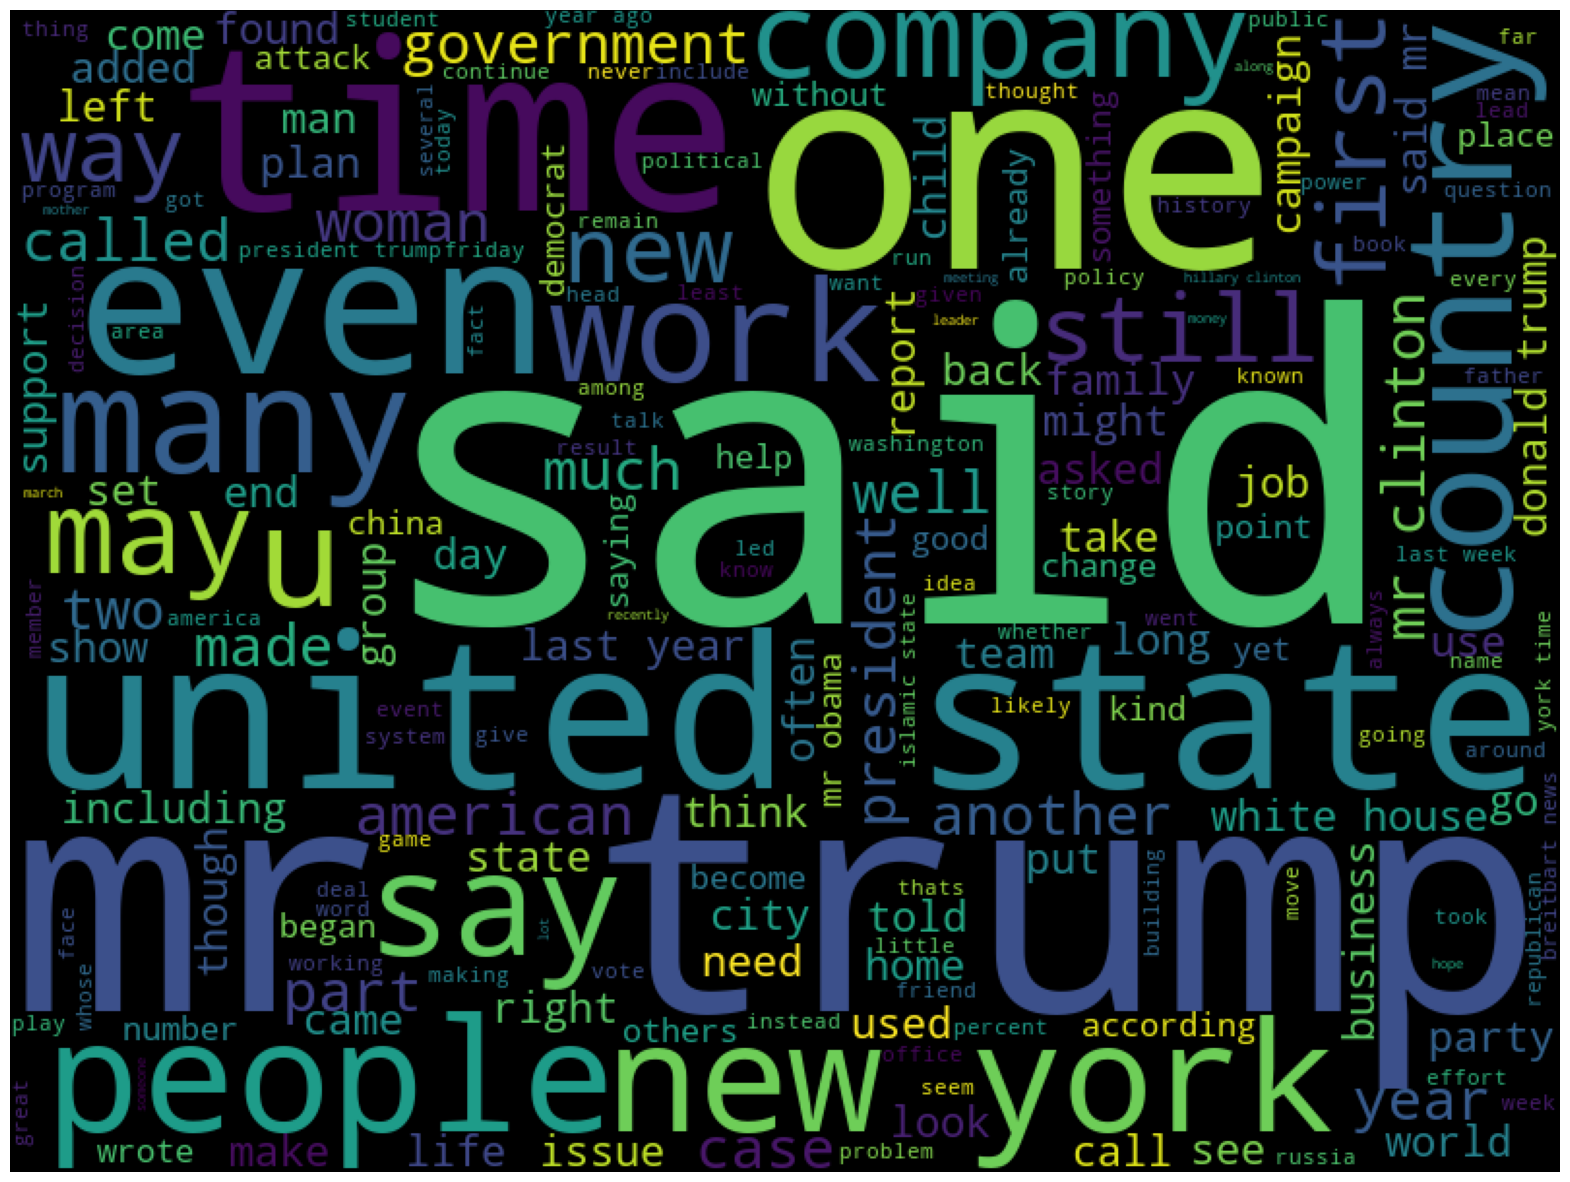

In [16]:
true_news = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Word cloud for Fake label news only

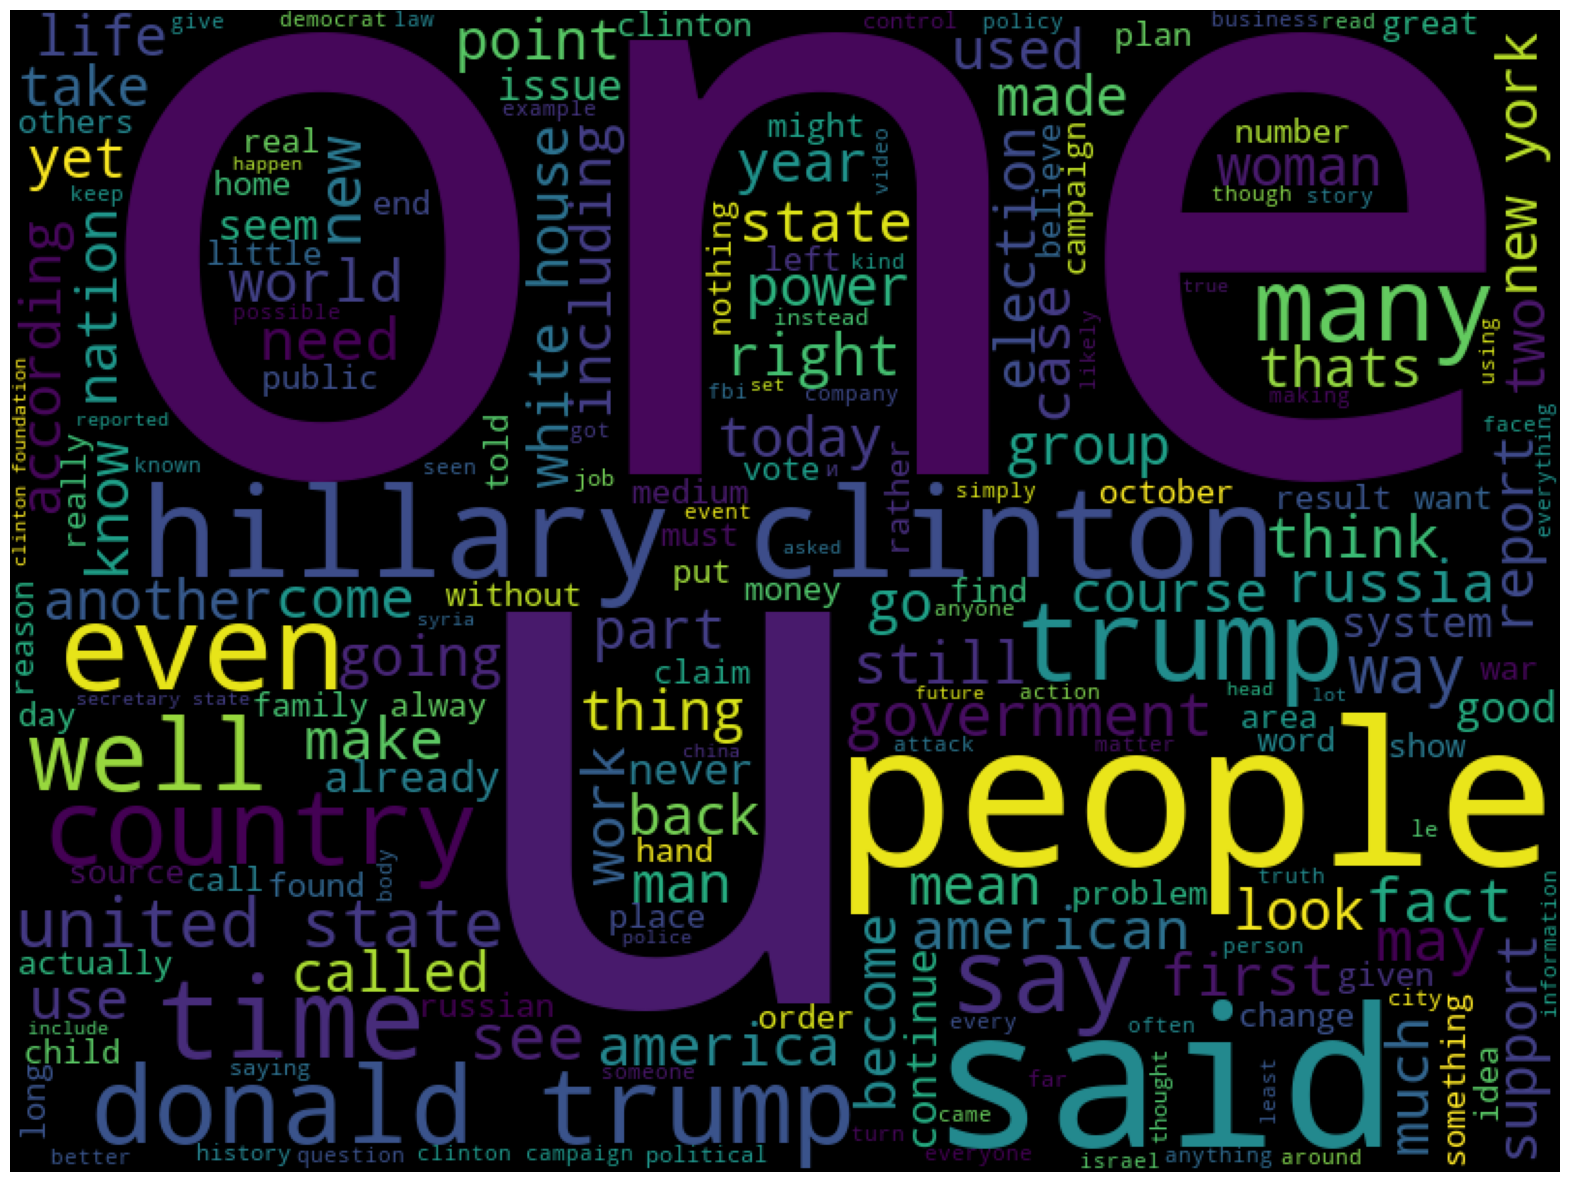

In [17]:
fake_news = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()


### N-Gram

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. 


### Most frequent Bigram(Two word combination) of True label

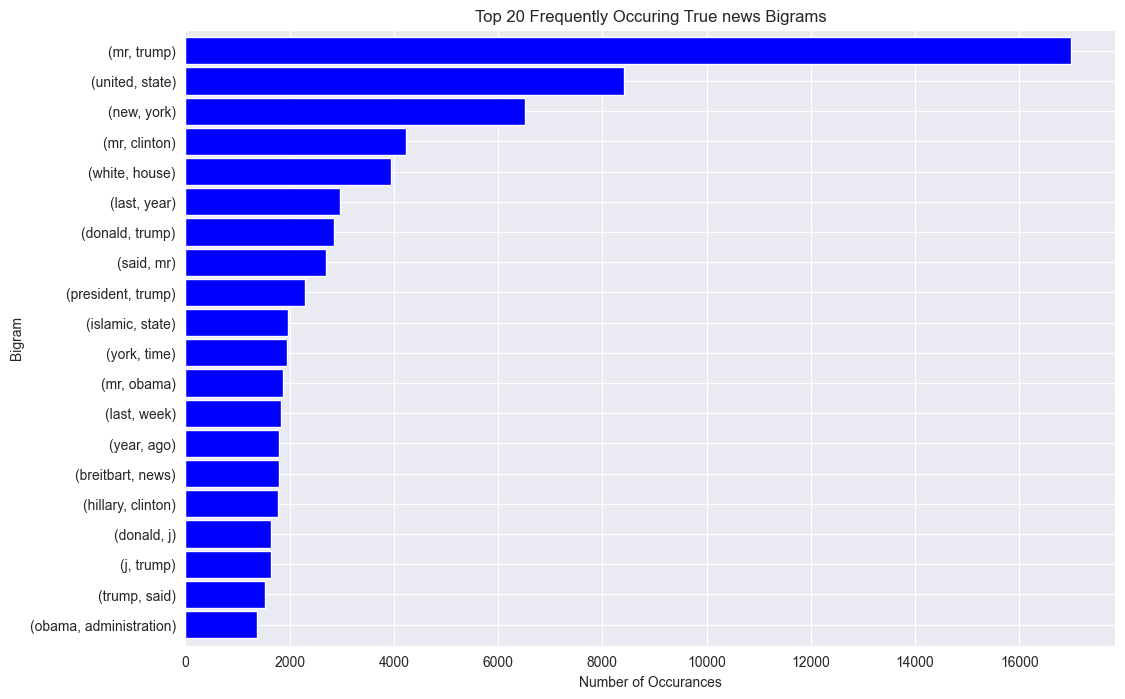

In [18]:
true_bigrams = (pd.Series(nltk.ngrams(true_news.split(), 2)).value_counts())[:20]
true_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show()

### Most frequent Bigram(Two word combination) of Fake label

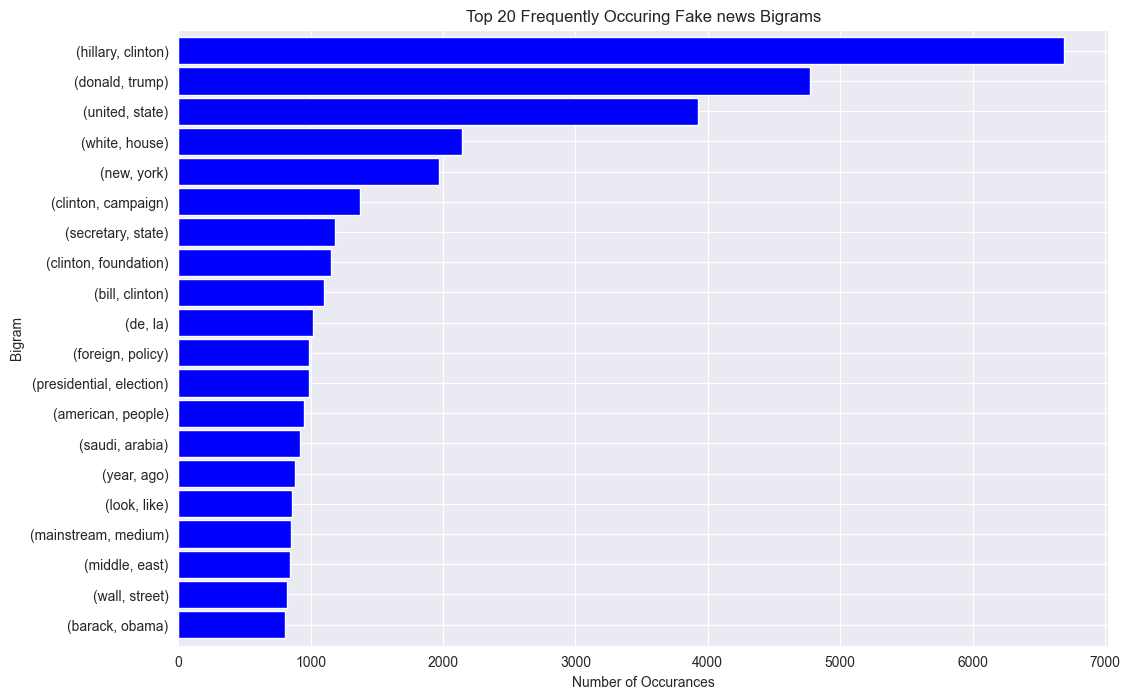

In [19]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_news.split(), 2)).value_counts())[:20]
fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show()

### Most frequent Trigram(Three word combination) of True label

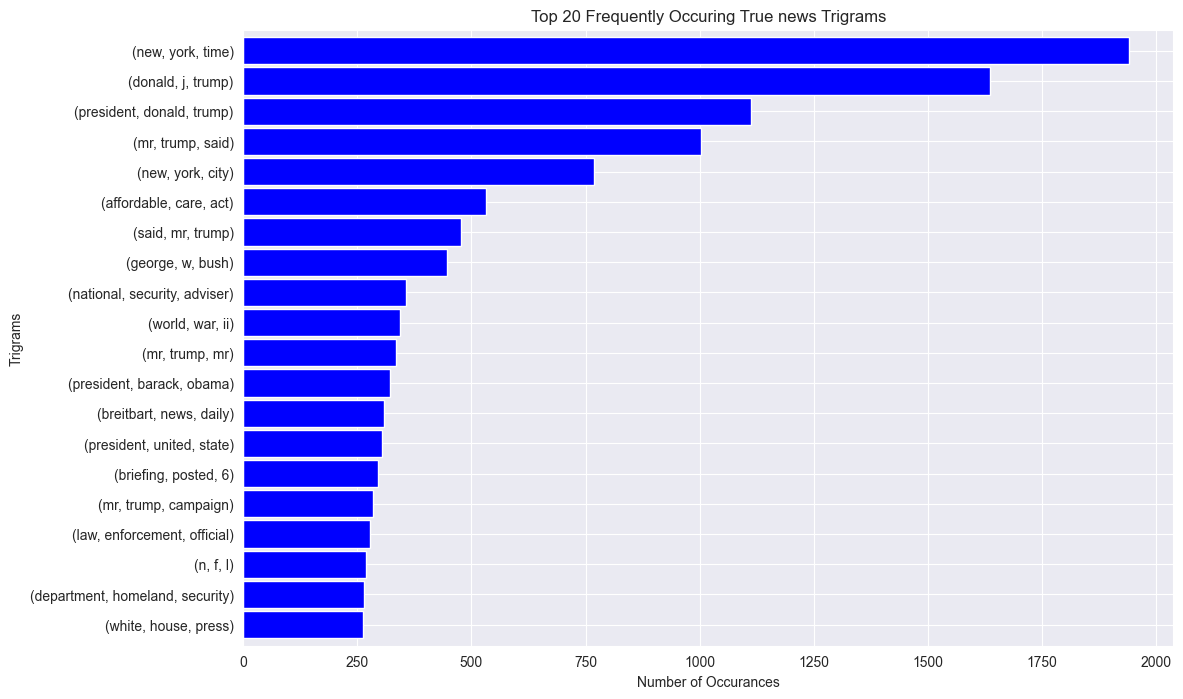

In [20]:
true_bigrams = (pd.Series(nltk.ngrams(true_news.split(), 3)).value_counts())[:20]
true_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show()

### Most frequent Trigram(Three word combination) of Fake label

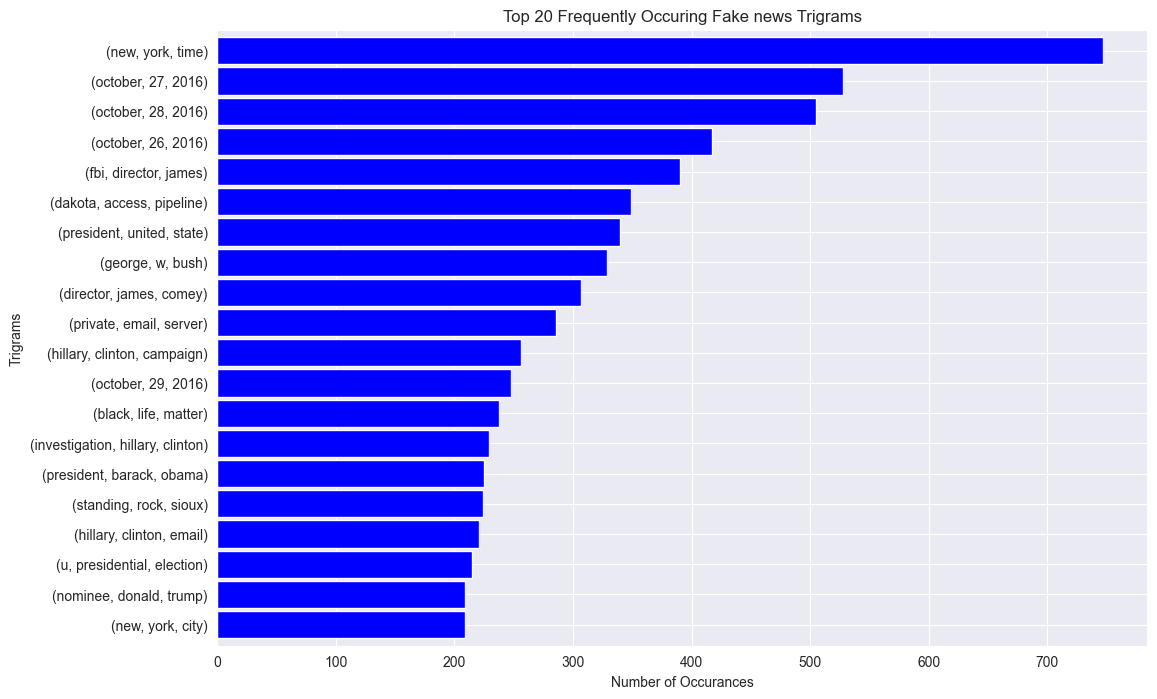

In [21]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_news.split(), 3)).value_counts())[:20]
fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show()

#### Hence from Word cloud as well as Different N-gram word anaysis it is difficult to conclude anything. So we will include all words to train our model.

## Splitting training dataset into train and test for model selection and validation
   - Merge all Text Feature
   - Split datasets in Train, Test 


In [22]:
## Merge Text features together
def merge_text_features(df, text_featuers = text_features):
    df['news']=df[text_featuers].agg(' '.join, axis=1)
    print("Merge news text statistics::\n ",df.news.str.split().str.len().describe())
    return df

## Preperaing Datasets
def preparing_datasets(df):
    XY = merge_text_features(df)
    #XY["news"] = XY.news.apply(clean_text)    
    print(" Cleaning as remove special character is done..")
    print(XY.head())
    #XY["news"] = XY.news.apply(nltk_preprocesing)
    X = XY['news']
    y = XY.label
    print("Text len statistic after Merge news and preprocessing::\n ",X.str.split().str.len().describe())
    if  y.dtype=='object':
        y= process_labels(y)
    return X,y

In [23]:

## preprocessing datasets
print(" Training data preprocessing ")
X,y = preparing_datasets(df)

print(" Test data preprocessing ")
X_test,y_test = preparing_datasets(df_test)


 Training data preprocessing 
Merge news text statistics::
  count    20800.000000
mean       440.236490
std        490.971666
min          1.000000
25%        166.000000
50%        331.000000
75%        602.000000
max      20731.000000
Name: news, dtype: float64
 Cleaning as remove special character is done..
                                               title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  \
0  house dem aide didnt even see comeys letter ja...      1   
1  ever get feeling life circle roundabout rather...      0   
2  truth might get fired october 29 2016 tension ...      1   
3  video 15 civilian killed single u airstrike id...      1   
4  print iranian woman sentenced six

**There we can observe that mean number word for each news record is 471 and 75% quartile words length is 650 only. 
So based on this statistic, we can fix our word sequence using any suitable size for all news length as equal size.**

## Data Preperation

## Sequence Data Transformation :
   - Tokenization
   - Text sequence generation
   - Pad the text sequence data

### Text Tokenization
Keras tokenizer to convert each text into a sequence of words, and then create the vocabulary using method on the tokenizer.

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

In [25]:
## Split datasets into train test sets to evalute mode with test size: 20%
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train,y_train = X,y
print("Train data counts::",X_train.shape)
print("Test data counts::",X_test.shape)

oov_token = "<OOV>" # it will be added to word_index and used to replace
                    #out-of-vocabulary words during text_to_sequence calls
vocab_size = 100000 #the maximum number of words to keep, based
                    #on word frequency
    
#tokenizer = Tokenizer(oov_token=oov_token)
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
text = X_train#['text']
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index
print("Word Index ")
print(len(word_index.keys()))

max_text_length = 100
#vocab_size = len(word_index)


# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Train data counts:: (20800,)
Test data counts:: (5200,)
Word Index 
201482


In [26]:
def prepare_seqence_data(df,tokenizer):
    # Transforms each text in texts to a sequence of integers.
    # Create Sequence
    print(" Create Sequence of tokens ")
    text_sequences = tokenizer.texts_to_sequences(df)

#     # Missing words in Glove vectors
#     words_used = [tokenizer.index_word[i] for i in range(1, vocab_size)]
#     missing_words = set(words_used) - set(word_vec.index.values)
#     print(len(missing_words))
#     missing_word_index = [tokenizer.word_index[word] for word in missing_words]
    
#     # Deleting above missing words
#     text_sequences = [[word for word in sentence if word not in missing_word_index] for sentence in text_sequences]
    print("Text to sequence of Id:: ", text_sequences[0:1])
    return text_sequences


### Padding
Padding used to make length of sequence equal for all input

In [27]:
padding_type = "post" # Type of padding pre or post of input sequence
trunction_type="post" # Type of truncation used to truncate input sequence if exceed from maximum sequence length

def pad_sequence_data(text_sequences,max_text_length):
    # Pad the Sequences, because the sequences are not of the same length,
    # so let’s pad them to make them of similar length
    text_padded = pad_sequences(text_sequences, maxlen=max_text_length, padding=padding_type,
                                          truncating=trunction_type)
    return text_padded

In [28]:
train_text_seq = prepare_seqence_data(X_train,tokenizer)
test_text_seq = prepare_seqence_data(X_test,tokenizer)

train_text_padded = pad_sequence_data(train_text_seq,max_text_length)
test_text_padded = pad_sequence_data(test_text_seq,max_text_length)

print("Padded Sequence :: ", test_text_padded[0:1])

print(" Tokenizer detail :: ", tokenizer.document_count)
print('Vocabulary size:', len(tokenizer.word_counts))
print('Shape of data padded:', train_text_padded.shape)

 Create Sequence of tokens 
Text to sequence of Id::  [[41, 4596, 929, 262, 20, 63, 2247, 542, 2686, 6401, 2707, 41, 4596, 929, 262, 20, 63, 2247, 542, 2686, 6401, 2707, 11198, 22889, 297, 560, 78, 2927, 2686, 6401, 9271, 17, 11110, 3675, 576, 4143, 635, 1, 892, 2474, 1, 2123, 3737, 5166, 32565, 1100, 1417, 308, 27, 1, 204, 650, 507, 87, 41, 190, 929, 134, 14, 16, 40, 1, 308, 60, 393, 507, 541, 48798, 542, 3726, 179, 547, 69, 39, 984, 28, 13, 69, 1118, 4422, 141, 2904, 356, 262, 1063, 507, 133, 1026, 1382, 5, 47, 356, 753, 40, 507, 6517, 47, 753, 190, 4422, 101, 41, 388, 3676, 3764, 356, 245, 4985, 69, 452, 1359, 153, 63, 3026, 1472, 183, 113, 542, 304, 3764, 356, 753, 2686, 6401, 226, 67, 27, 17382, 1382, 179, 19067, 2468, 179, 1186, 2187, 69, 1068, 6729, 166, 82, 4366, 2686, 6401, 31076, 297, 1132, 78, 315, 40, 82, 507, 339, 233, 4985, 69, 616, 6314, 1, 40, 1826, 4033, 6852, 2681, 1328, 185, 66, 158, 262, 254, 6401, 3675, 47, 188, 3189, 8938, 11941, 166, 28, 1, 196, 26, 11, 1036, 163

## Feature Engineering
### Text Encoding : Vectorization
- One Hot encoding
- count vector, eg: TFIDF
- Word embedding
    - Word2Vec
    - GLOVE
    - FASTEXT
    - etc
    
**In this section we will use GLOVE to convert text into numeric vector representation**

## Word Embedding
- Word embdding take care of word reprenetation 
- Word embedding algorithms can figure out tons of relationships from the text data. They use the idea of context and learn by seeing what word occurs near other words. It can represent words with fixed number of dimension instead of One-hot or count reprsentation with huge number of vocablury size.
- There are many popular word embedding algorithms available out there. Glove and Word2Vec are the most popular ones.
- We will use here Glove embedding
- Glove trained on Gigaword corpus (400,000 word vectors based on 6 billion tokens), available as 50d, 100d, 200d, and 300d vectors

In [36]:
## COnstants for Word Embeddings
##########################
## Embedding Parametrs ###

emb_dim = 100
embedding_type = 'glove'
glove_dir = root_dir+'\\input\\glove\\'
glove_file = glove_dir+"glove.6B."+str(emb_dim)+"d.txt"
vocab_size = len(word_index)+1

In [37]:
##### Create GLove Word embedding #########
#### Download glove if not exist ########

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

def read_glove_embedings():
    word_vec = pd.read_table(glove_file, sep=r"\s", header=None, engine='python',
                             encoding='iso-8859-1', on_bad_lines='skip')
    word_vec.set_index(0, inplace=True)

    print('Found %s word vectors.' % len(word_vec))
    print('politics',word_vec.head())
    return word_vec

# Golve embedding use tokenizer for 
# word index, vocab size
def glove_embedings(tokenizer):
    embeddings_index = read_glove_embedings()
    embedding_matrix = np.zeros((vocab_size, emb_dim))

    #embedding_weights = np.zeros((10000, 50))
    index_n_word = [(i, tokenizer.index_word[i]) for i in range(1, len(embedding_matrix)) if
                    tokenizer.index_word[i] in embeddings_index.index]
    idx, word = zip(*index_n_word)
    embedding_matrix[idx, :] = embeddings_index.loc[word, :].values

    return embedding_matrix

def onehot_embedding(tokenizer):
    onehot_vec =  [one_hot(words, (len(tokenizer.word_counts) +1)) for words in tokenizer.word_index.keys()]
    embedded_docs = pad_sequences(onehot_vec, padding='pre', maxlen=max_text_length)
    return embedded_docs

def build_embeddings(tokenizer):
    vocab_len = vocab_size
    print(" vocab_len ", vocab_size)
    
    if embedding_type=='glove':
        embedding_matrix =  glove_embedings(tokenizer)
        print(" Encoded word sequence:: ",embedding_matrix[0:10])
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   weights=[embedding_matrix], trainable=False)
    elif embedding_type=='fasttext':
        embedding_matrix =  fasttext_embedings()
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   weights=[embedding_matrix], trainable=False)
    else:
        embedding_matrix = onehot_embedding(tokenizer)
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   trainable=False)

    return embeddingLayer


In [38]:
embeding_layer = build_embeddings(tokenizer)

 vocab_len  201483


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Shubhangam\\Desktop\\Desktop\\Programming\\training\\input\\glove\\glove.6B.100d.txt'

## Building Sequence Model
### Approach:
1. Recurrent Neural Network: Simple RNN
2. Long Short Time Memory
3. GRU

### Steps to build Sequence Network

1. Input Layer
    - In Text case input woud be sequence of worde index
    - (Max_sequence_length,number_training_size) 
    ---------------------------------------------
2. Embedding Layer
    - This layer convert each word index into vector representation of size(50,100,200,300)
    - This could be One-hot or pre-trained(glove or fastetxt) or trainiable word2Vec(example: using gensim)
    - One-hot would represent each word to size of vocabulary size
    - In this experiment we used pre-trained model: glove with 50 and 100 dimension vector.
    - embedding layer input: Input
    - Output: (training_size,Max_sequence_length,embedding_dimension ) 
    ---------------------------------------------
3. Hidden layer: RNN/LSTM/GRU
    - input: embedding output
    - output: (training_size,no_of_nurons)    
    -------------------------------------------
4. Stacked Layer: Multiple layer of RNN/LSTM/GRU can be repeated
    - Stack layer need to return the same sequence from previous layer
    - return_sequence = True
    - because RNN/LSTM/GRU need the same sequence of input  
    -------------------------------------------------------------------
5. Dense Layer:
    - collect final context output from Sequence layer
    - Activation function: Relu    
    ---------------------------------------------------
6. Dropout/Batchnormalization after hidden layer if rquire, which is regularization technique to avoid over-fitting/vanishing gradiant. 
    
    ----------------------------------------------------------------------------------------
    
7. Multiple Dense layer if require
    
    -------------------------------------------------------------------------------
    
8. Output Layer: 
    - Sigmoid: Activation function for binary class
    

### Parameter to Tune
- Vocabulary length
- max sequence length
- Embedding size: 50/100/200/300
- Neural Network: RNN/GRU/LSTM
- No of Sequence layer 
- No.of Dense Hidden Layers
- Dropout
- Hidden layer dimension
- No. of Epochs
- Batch size

In [ ]:
#####################
###  PARAMS  ###
#####################
sequence_neuron_size = 100
hidden_layer_1 = 32
epochs = 20
batch_size = 256
classifier = 'binary'

## Build Recurrent Neural Network

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GRU, SimpleRNN
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from datetime import date
from os.path import exists

#Building Sequential network with
#   Embeding Layer
#   LSTM
#   Dense
#   Output Layer
def build_network_lstm(embedding_layer):
    
    print(" Building Sequential network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(sequence_neuron_size)))#, return_sequences=True))
    #model.add(LSTM(100))    
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_network_GRU(embedding_layer):

    print(" Building GRU network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(GRU(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_network_RNN(embedding_layer):

    print(" Building RNN network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(SimpleRNN(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def train_model(model,X_train,y_train,X_test, y_test):
    
    # Compile Model with loss function, 
    # optimizer and metricecs as minimum parameter
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    # Train model with Train and test set data
    # Number of epochs, batch size as minimum parameter
    history = model.fit(X_train, y_train, epochs=epochs,batch_size = batch_size ,validation_split=0.2)#validation_data=(X_test, y_test))   
    return model,history

def performance_history(history,model_type,name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.savefig(model_dir + image_dir+ model_type+'/' + name + "_performance.jpeg") 

def model_evaluation(model,X_test,y_test):
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score

def store_model(model,model_type,name):
    # Store the model as json and 
    # store model weights as HDF5
    
    # serialize model to JSON
    model_json = model.to_json()
    with open(model_dir+model_type+'/'+name+"_model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save(model_dir +model_type+'/'+ name + "_model.h5")
    print("Saved model to disk")
    
def performance_report(model,testX,testy):

    time = date.today()

    yhat_probs = model.predict(testX, verbose=0)
    # predict crisp classes for test set
    yhat_classes = model.predict_classes(testX, verbose=0)

    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, yhat_classes)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes)
    print('F1 score: %f' % f1)

    if exists(output_dir + 'report.csv'):
        total_cost_df = pd.read_csv(output_dir + 'report.csv', index_col=0)
    else:
        total_cost_df = pd.DataFrame(
                columns=['time', 'name', 'Precision', 'Recall', 'f1_score', 'accuracy'])

    total_cost_df = total_cost_df.append(
            {'time': time, 'name': name,'Precision': precision, 'Recall': recall, 'f1_score': f1,'accuracy':accuracy},
            ignore_index=True)
    total_cost_df.to_csv(output_dir + 'report.csv')


### Training Steps:
- Build Network
- Compile
- Fit model to train
- Hyperparamter Tunning, If required
- Evaluate model with Test set

In [ ]:
dash = "-"
name = "Model_"

### RNN

In [ ]:
%%time

## Build Network
model_type='RNN'
epochs = 20
batch_size = 256
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_rnn = build_network_RNN(embeding_layer)

model_rnn,history = train_model(model_rnn,train_text_padded,y_train,test_text_padded, y_test)

In [ ]:
performance_history(history,model_type,name)
store_model(model_rnn,model_type,name)
model_evaluation(model_rnn,test_text_padded,y_test)
performance_report(model_rnn,test_text_padded,y_test)

### Running GRU network

In [ ]:
%%time

## Build Network
model_type = 'GRU'
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_gru = build_network_GRU(embeding_layer)

model_gru,history_gru = train_model(model_gru,train_text_padded,y_train,test_text_padded, y_test)

In [ ]:
model_type = 'GRU'
performance_history(history_gru,model_type,name)
store_model(model_gru,model_type,name)
model_evaluation(model_gru,test_text_padded,y_test)
performance_report(model_gru,test_text_padded,y_test)

### Running LSTM network

In [ ]:
%%time
model_type = 'LSTM'
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

## Build Network
model_lstm = build_network_lstm(embeding_layer)

model_lstm,history_lstm = train_model(model_lstm,train_text_padded,y_train,test_text_padded, y_test)

In [ ]:
performance_history(history_lstm,model_type,name)
store_model(model_lstm,model_type,name)
model_evaluation(model_lstm,test_text_padded,y_test)
performance_report(model_lstm,test_text_padded,y_test)

#### Train Model and Evaluate Model

From above experience, GRUs train faster and perform better than LSTMs on less training data.
- GRUs are simpler and thus easier to modify, for example adding new gates in case of additional input to the network. It's just less code in general.
- LSTMs should in theory remember longer sequences than GRUs and outperform them in tasks requiring modeling long-distance relations.

*Reference Paper.*
[Neural GPUs Learn Algorithms](https://arxiv.org/abs/1511.08228)
[Comparative Study of CNN and RNN for Natural Language Processing](https://arxiv.org/abs/1702.01923)



RNNs model sequential data, and are designed to capture how outputs at the current time step are influenced by the inputs that came before them. This is referred to as long-range dependencies. At a high level, this allows the model to remember what it has seen so far in order to better contextualize what it is seeing at the moment. 

It is what makes these models so powerful, but it is also what makes them so hard to train. 
RNNs Training use back-propagation through time (BPTT) to update the both weight of Previous layer as well as previous timestep instead of just Backpropogation through previous layer only.


1. The **current** state is a function of the **previous** state and the current input: $h_t = \sigma(W_{hh}h_{t-1} + W_{xh}x_t)$
2. The gradient of the loss $E_t$ at time $t$ on $W_{hh}$ is a function of the current hidden state and model predictions $\hat{y}_t$ at time t: 
$\frac{\partial E_t}{\partial W_{hh}} = \frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial W_{hh}}$
3. Substituting (1) into (2) results in a **sum over all previous time-steps**:
$\frac{\partial E_t}{\partial W_{hh}} = \sum\limits_{k=0}^{t} \underbrace{\frac{\partial E_t}{\partial \hat{y}_t}\frac{\partial\hat{y}_t}{\partial h_t}\frac{\partial h_t}{\partial h_k}\frac{\partial h_k}{\partial W_{hh}}}_\text{product of gradient terms}$

The problem is that $\frac{\partial h_t}{\partial h_k} = \Pi_j \frac{\partial h_j}{\partial h_{j-1}}$ for j from $k + 1$ to $t$.  Because of this **repeated multiplicative interaction**, as the sequence length $t$ gets longer, the gradients themselves can get diminishingly small (**vanish**) or grow too large and result in numeric overflow (**explode**). Ideally, in order to avoid these beheviors, the norms of the gradients should be close to 1. 

**Two main Issues with RNN:**
1. Due to short-term memory it’s too difficult for RNN to learn to preserve information over many timesteps.
2. Hidden state is constently being rewritten due to vanishing gradient.

**So need to solve these two issue using Memory and Gated Machinism, which can handle long sequence and their gredeint. These two issue would resolved by LSTM and GRU using multiple gate/memory cells.**




In [ ]:
from tensorflow import keras
#import keras
model = keras.models.load_model('model.h5')

In [ ]:
test = pd.Series(news_df["text"][5])

In [ ]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenize = pickle.load(handle)

In [ ]:
data = prepare_seqence_data(test,tokenize)
prem = pad_sequence_data(data,max_text_length)

In [ ]:
pred = model.predict_classes(prem)

In [ ]:
if pred == 1:
    print("it looks like a fake news")
else:
    print("it looks like a real news")